# Step 3: Collecting Data


# Step 4:  Exploring data 


In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('mcdonalds.csv')

In [6]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [10]:
df.shape

(1453, 15)

In [13]:
# checking datatypes for each columns 

df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [15]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [16]:
# checking for unique values 

df.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [17]:
# checking for null values in each column

df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [18]:
# Count the number of occurrences of each value in Like Column

df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [104]:
# Changing the dataset to numerical data 
# Replace "Yes" with 1 and "No" with 0
df.replace({"Yes": 1, "No": 0}, inplace=True)

# Replace "Male" with 0 and "Female" with 1 in the "Gender" column
df['Gender'].replace({"Male": 0, "Female": 1}, inplace=True)

# Replace "Once a week" with 0, "Once a month" with 1, and "Once a year" with 2 in the "VisitFrequency" column
df['VisitFrequency'].replace({"Once a week": 0, "Once a month": 1, "Once a year": 2}, inplace=True)

# Save the modified dataframe back to the file
df.to_csv('mcdonalds_modified.csv', index=False)

In [105]:
df1 = pd.read_csv('mcdonalds_modified.csv')

In [108]:
df1.dtypes

yummy              int64
convenient         int64
spicy              int64
fattening          int64
greasy             int64
fast               int64
cheap              int64
tasty              int64
expensive          int64
healthy            int64
disgusting         int64
Like              object
Age                int64
VisitFrequency    object
Gender             int64
Segment            int64
dtype: object

array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>,
        <Axes: title={'center': 'fattening'}>],
       [<Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>,
        <Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>],
       [<Axes: title={'center': 'expensive'}>,
        <Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Segment'}>, <Axes: >, <Axes: >]],
      dtype=object)

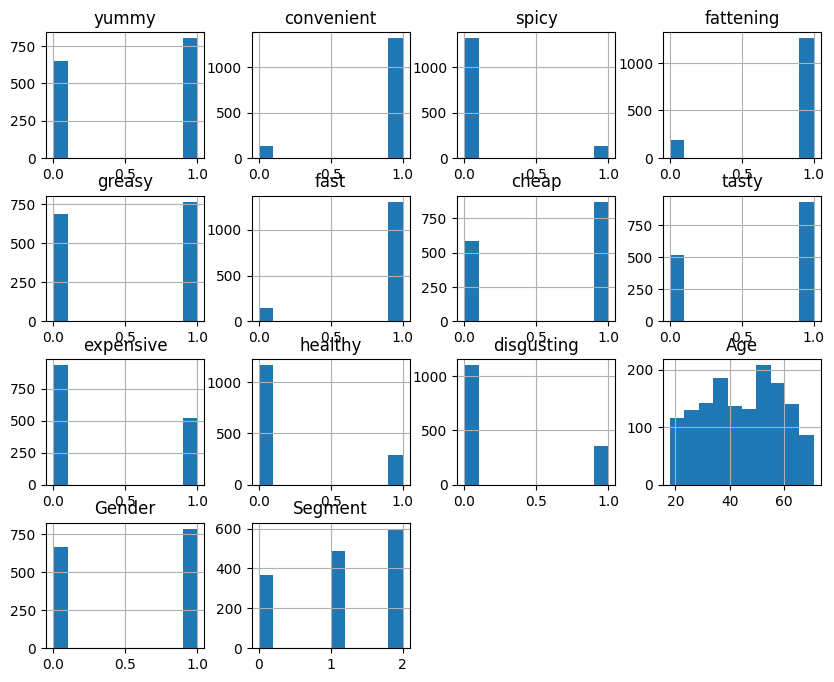

In [109]:
# Data Visualiation 

df1.hist(figsize=(10, 8), bins=10)



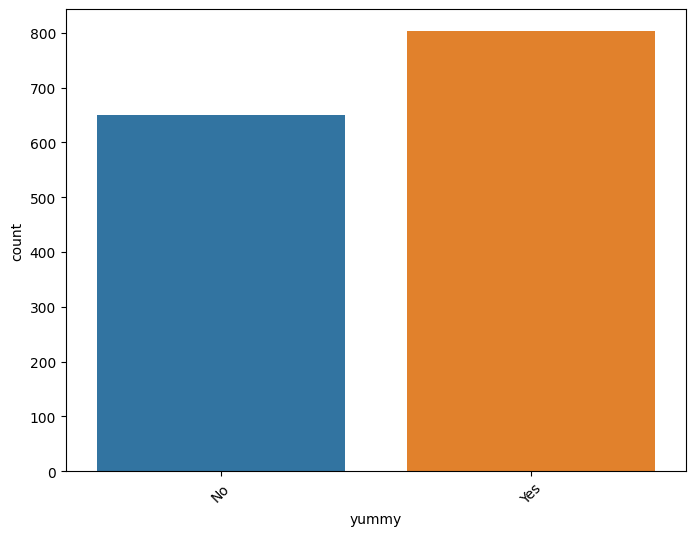

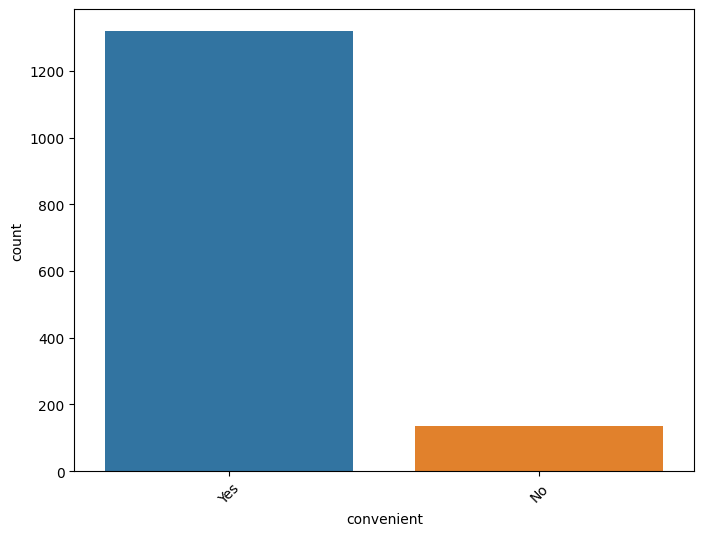

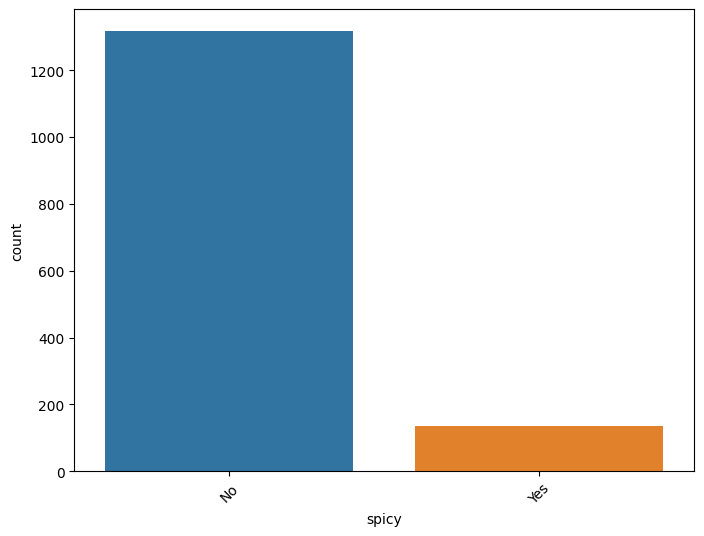

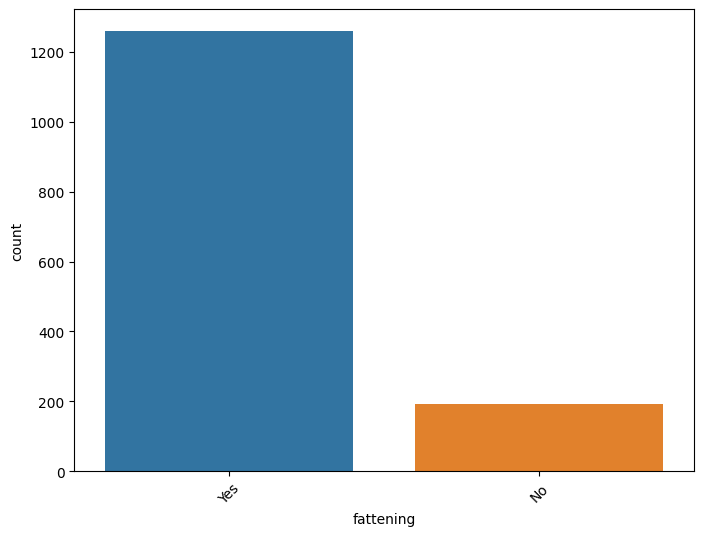

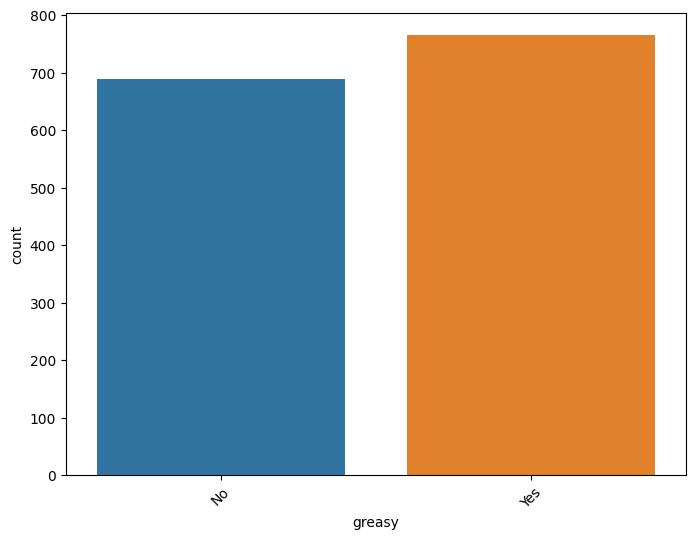

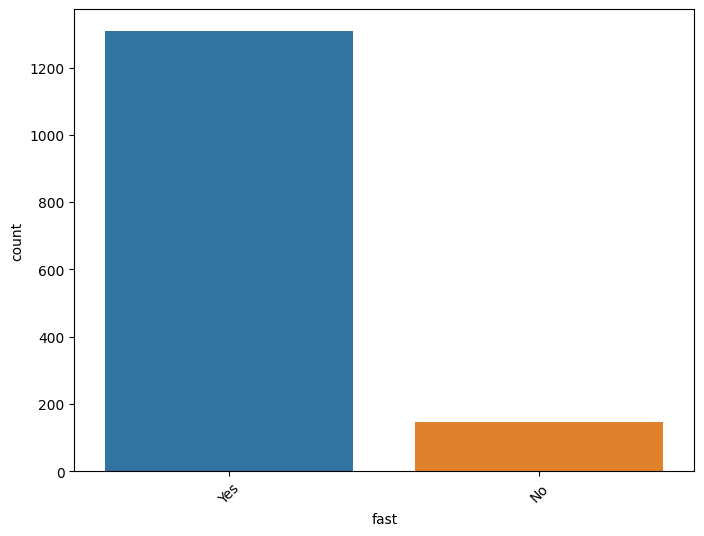

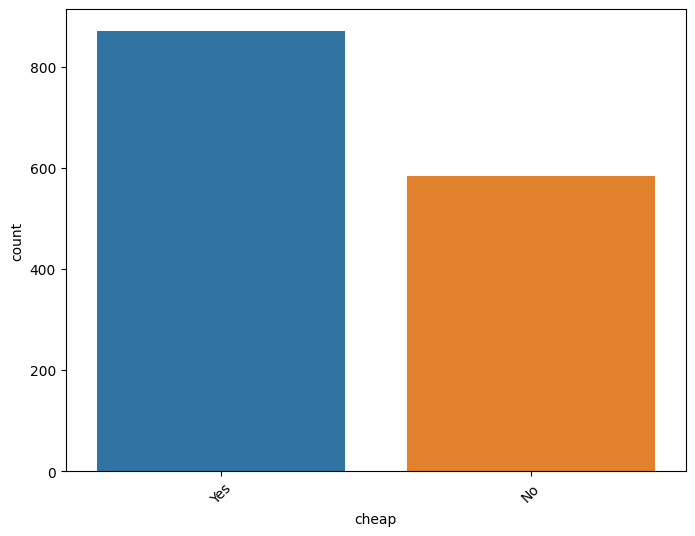

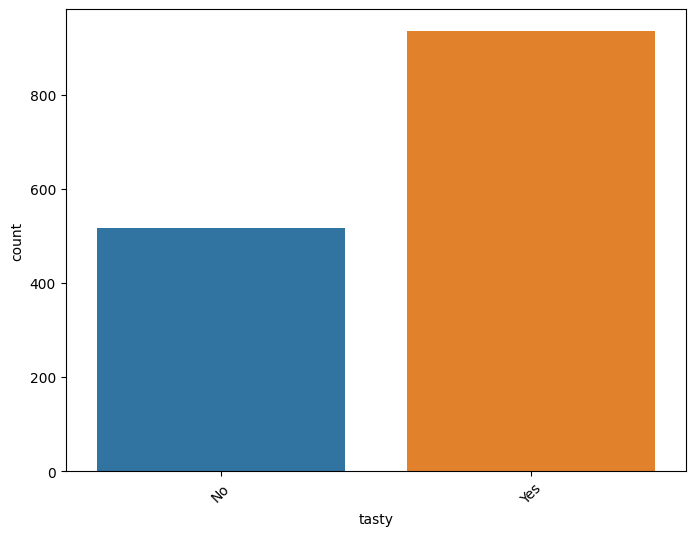

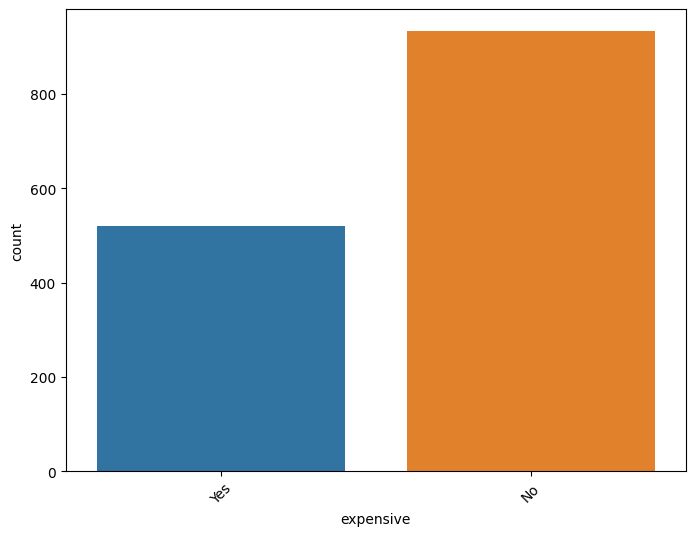

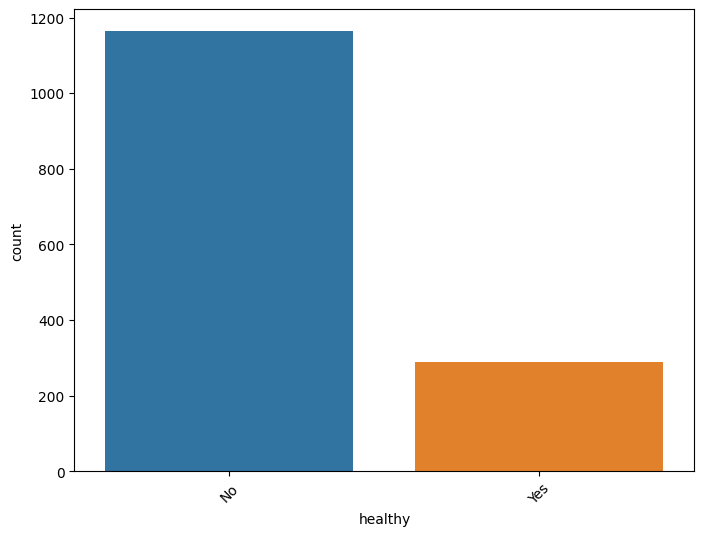

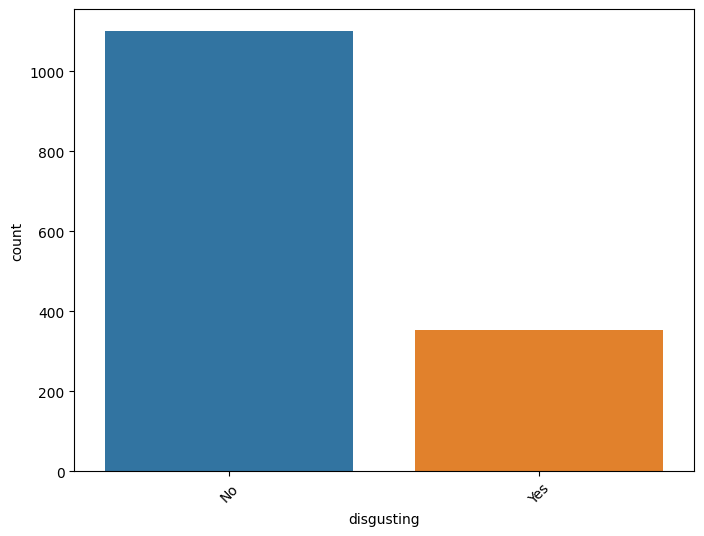

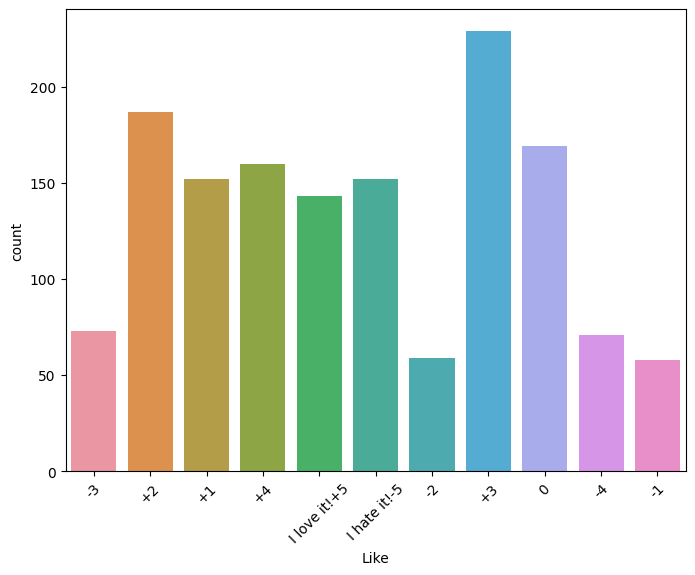

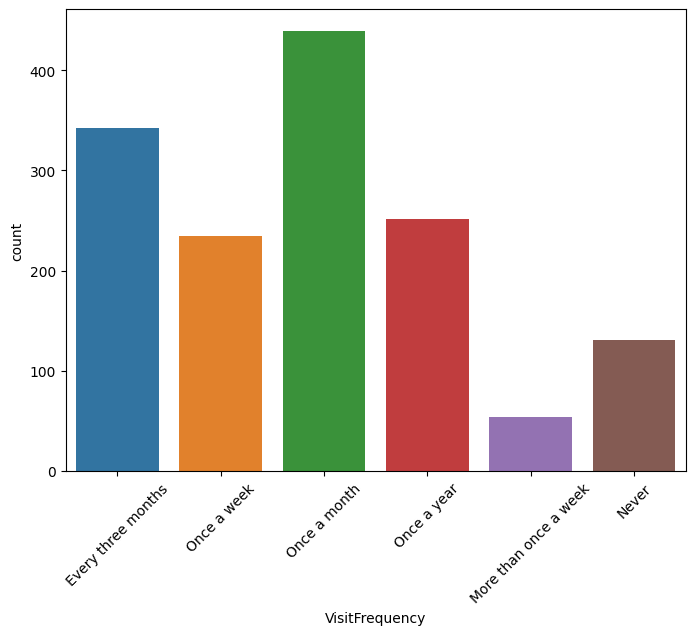

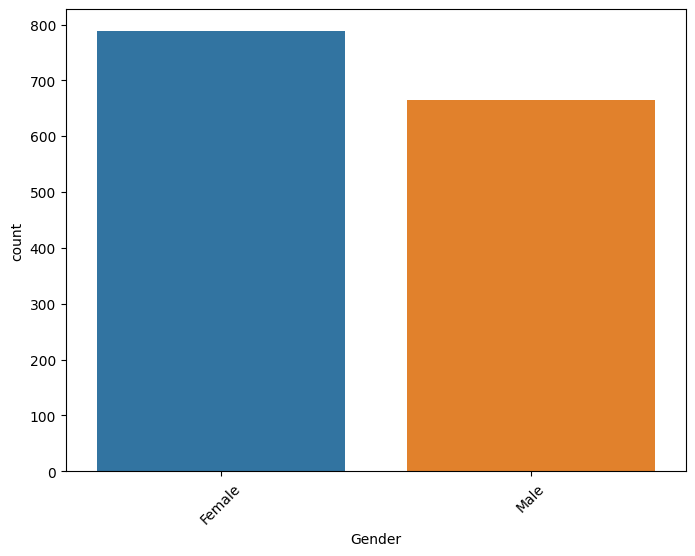

In [33]:
# Bar plot of categorical columns
cat_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
            'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
            'VisitFrequency', 'Gender']
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)



# Step 5: Extracting Segments

In [132]:
import pandas as pd
from sklearn.cluster import KMeans


# K-means Analysis for Segmentation

In [112]:
# Select relevant columns for clustering
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
           'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


In [113]:
# Perform segmentation using K-means clustering
kmeans_df = df1[cat_cols]
kmeans_df_encoded = pd.get_dummies(kmeans_df, drop_first=True)  # One-hot encoding
kmeans = KMeans(n_clusters=3, random_state=42)  # Define the number of clusters
kmeans.fit(kmeans_df_encoded)  # Fit the K-means model
segment_labels = kmeans.labels_  # Get the segment labels
segment_df = pd.DataFrame({'Segment': segment_labels})  # Create a segment DataFrame
segment_df['Segment'] = segment_df['Segment'].astype('category')

c:\Users\Karan Singh\Desktop\Feynn Labs  Work\2nd Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [114]:
# Print the segments rules
print("K-means Clustering Segments:")
segment_counts = segment_df['Segment'].value_counts()
for segment, count in segment_counts.items():
    print(f"Segment {segment}: {count} instances")

K-means Clustering Segments:
Segment 1: 595 instances
Segment 2: 488 instances
Segment 0: 370 instances


In [131]:
# Print the segments
print("K-means Clustering Segments:")
print(segment_df['Segment'].value_counts())

K-means Clustering Segments:
Segment
1    595
2    488
0    370
Name: count, dtype: int64


# Step 7: Describing Segments

In [134]:
    # Assign segment labels to the original dataset
df['Segment'] = segment_labels

In [135]:
# Describing the segments
segment_stats = df.groupby('Segment')[cat_cols].apply(lambda x: x.mode().iloc[0])
segment_counts = df['Segment'].value_counts()

In [156]:
# Print the segment descriptions
print("Segment Descriptions:")
for segment, count in segment_counts.items():
    print(f"\nSegment {segment}:")
    print(f"Count: {count}\n")
    print(segment_stats.loc[segment].to_string())


Segment Descriptions:

Segment 1:
Count: 2

0
yummy              1
convenient         1
spicy              0
fattening          1
greasy             0
fast               1
cheap              1
tasty              1
expensive          0
healthy            0
disgusting         0
Like              +3
VisitFrequency     1
Gender             1

Segment 0:
Count: 1

0
yummy              1
convenient         1
spicy              0
fattening          1
greasy             1
fast               1
cheap              0
tasty              1
expensive          1
healthy            0
disgusting         0
Like              +3
VisitFrequency     1
Gender             0


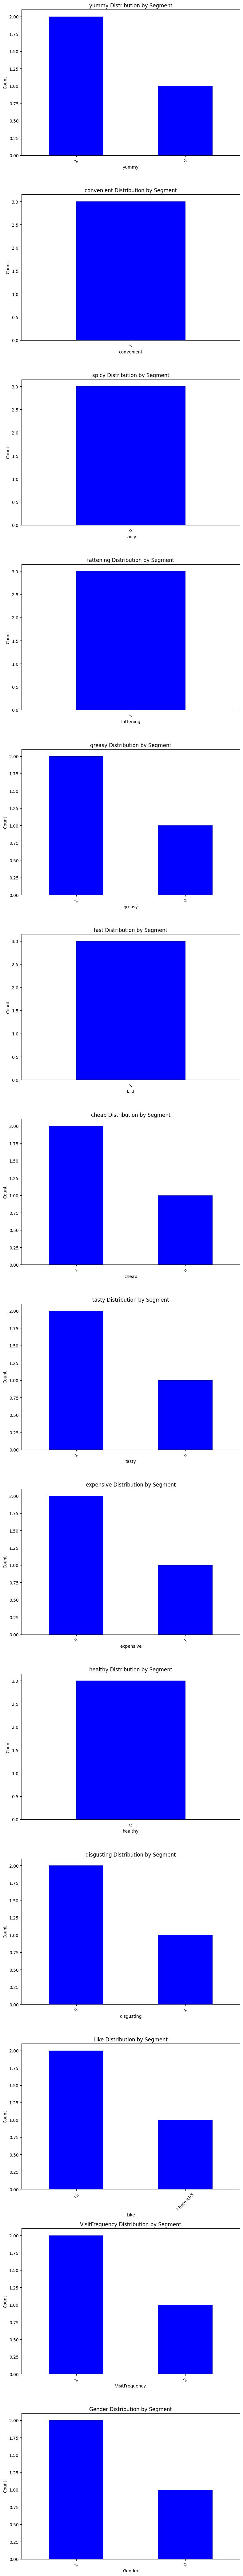

In [157]:
# Plotting segment descriptions
fig, axs = plt.subplots(len(cat_cols), 1, figsize=(8, 6*len(cat_cols)))

for i, col in enumerate(cat_cols):
    ax = axs[i]
    segment_values = segment_stats[col]
    segment_counts = segment_values.value_counts()
    segment_counts.plot(kind='bar', ax=ax, color='blue')
    ax.set_ylabel("Count")
    ax.set_title(f"{col} Distribution by Segment")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()